In [695]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, MinMaxScaler
import numpy as np

In [696]:
df = pd.read_csv('train.csv')

In [697]:
df.shape

(10886, 12)

In [698]:
df_mini = df.drop(columns=['season', 'holiday', 'workingday'])

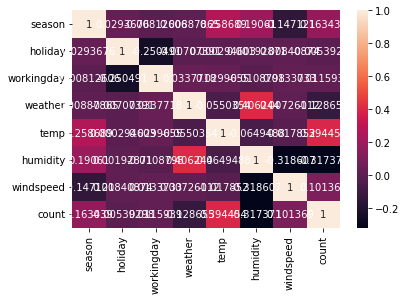

In [753]:
df_corr = df.drop(columns=["casual","registered","atemp"])
corrMatrix = df_corr.corr()
sns.heatmap(corrMatrix, annot=True, fmt='g')
plt.show()

In [700]:
df['datetime'] = pd.to_datetime(df['datetime'])

### Create a dataframe only storing the number of bikes rented

Sums of bikes rented will be easier to calculate if we drop all weather data

In [701]:
df_simple = df.drop(columns=['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed'])

In [702]:
df_simple_reindexed = df_simple.set_index(pd.to_datetime(df['datetime']))

In [703]:
df_simple_reindexed.head()

,datetime,casual,registered,count
datetime,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,3,13,16
2011-01-01 01:00:00,2011-01-01 01:00:00,8,32,40
2011-01-01 02:00:00,2011-01-01 02:00:00,5,27,32
2011-01-01 03:00:00,2011-01-01 03:00:00,3,10,13
2011-01-01 04:00:00,2011-01-01 04:00:00,0,1,1


### Analysing weekly data

In [704]:
df_weekly = df_simple_reindexed.resample('7D').sum()

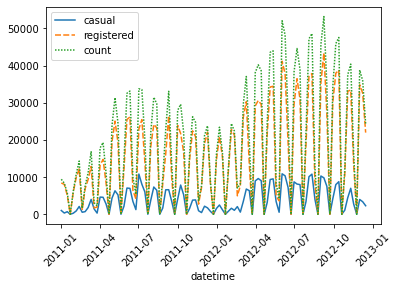

In [705]:
sns.lineplot(data=df_weekly)

plt.xticks(rotation=45)
plt.show()

### Analysing monthly data

In [706]:
df_monthly = df_simple_reindexed.resample('30D').sum()

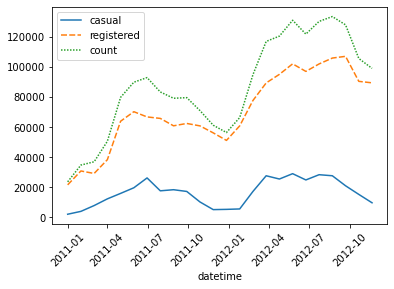

In [707]:
sns.lineplot(data=df_monthly)

plt.xticks(rotation=45)
plt.show()

### Analysing hourly data

In [708]:
df_by_time = df_simple

In [709]:
df_by_time['time'] = df_by_time['datetime'].dt.time

In [710]:
df_by_time = df_by_time.drop(columns=['datetime'])

In [711]:
df_by_time['time'] = df_by_time['time'].astype('str')

In [712]:
df_by_time.set_index(df_by_time['time'], inplace=True)

In [713]:
df_by_time.head()

,casual,registered,count,time
time,,,,
00:00:00,3,13,16,00:00:00
01:00:00,8,32,40,01:00:00
02:00:00,5,27,32,02:00:00
03:00:00,3,10,13,03:00:00
04:00:00,0,1,1,04:00:00


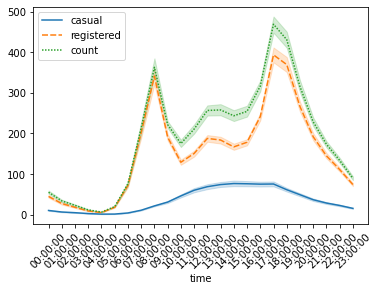

In [714]:
sns.lineplot(data=df_by_time)
plt.xticks(rotation=45);

In [715]:
df_weekdays = df_simple

In [716]:
df_simple

,datetime,casual,registered,count,time
0,2011-01-01 00:00:00,3,13,16,00:00:00
1,2011-01-01 01:00:00,8,32,40,01:00:00
2,2011-01-01 02:00:00,5,27,32,02:00:00
3,2011-01-01 03:00:00,3,10,13,03:00:00
4,2011-01-01 04:00:00,0,1,1,04:00:00
...,...,...,...,...,...
10881,2012-12-19 19:00:00,7,329,336,19:00:00
10882,2012-12-19 20:00:00,10,231,241,20:00:00
10883,2012-12-19 21:00:00,4,164,168,21:00:00
10884,2012-12-19 22:00:00,12,117,129,22:00:00


In [717]:
df_weekdays['day_name'] = df_weekdays['datetime'].dt.day_name()

In [718]:
df_weekdays.set_index(df_weekdays['day_name'], inplace=True)

In [719]:
df_weekdays = df_weekdays.drop(columns=['time', 'datetime', 'day_name'])

In [720]:
df_weekdays.head()

,casual,registered,count
day_name,,,
Saturday,3,13,16
Saturday,8,32,40
Saturday,5,27,32
Saturday,3,10,13
Saturday,0,1,1


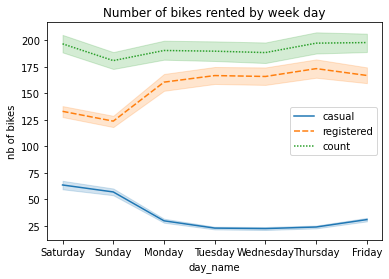

In [721]:
sns.lineplot(data=df_weekdays)
plt.xlabel('day_name')
plt.ylabel('nb of bikes')
plt.title('Number of bikes rented by week day');

### Linear regression

In [722]:
df = pd.read_csv('train.csv')
#df['datetime'] = pd.to_datetime(df['datetime'])
#df.set_index(df['datetime'], inplace=True)


In [723]:
df_test = pd.read_csv('test.csv')
df_test = df_test.set_index('datetime')
datetime_data = df_test.index
df_test.reset_index(inplace=True)

In [724]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [725]:
X = df.drop(columns=['count','registered','casual'])
y = df['count']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8164, 9), (2722, 9), (8164,), (2722,))

In [726]:
X_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
2930,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980
7669,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028
1346,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032
9432,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981
453,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980


In [727]:
#sns.pairplot(data=df)

In [728]:
def clean_dataframe(dataframe):
    dataframe['datetime'] = pd.to_datetime(dataframe['datetime'])
    dataframe['day_name'] = dataframe['datetime'].dt.day_name()
    dataframe['date'] = dataframe['datetime'].dt.date
    dataframe['time'] = dataframe['datetime'].dt.hour
    dataframe.set_index(dataframe['datetime'])
    dataframe = dataframe.drop(columns = ['atemp','datetime','date','holiday'], inplace=True)

In [729]:
clean_dataframe(X_train)
clean_dataframe(X_test)
clean_dataframe(df_test)

In [730]:
X_train.isna().sum()

season        0
workingday    0
weather       0
temp          0
humidity      0
windspeed     0
day_name      0
time          0
dtype: int64

In [731]:
pipeline_hour = Pipeline([
    ("binning", KBinsDiscretizer(n_bins=24, encode='onehot-dense', strategy='uniform')),
])

In [732]:
pipeline_encode = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown='ignore', sparse=False, drop='if_binary')),
])

In [733]:
pipeline_weather = Pipeline([
    ("scaling", MinMaxScaler()),
])

In [734]:
transformer = ColumnTransformer(
    [
        ("hour", pipeline_hour, ['time']),
        ("encode", pipeline_encode, ['season','workingday','weather','day_name']),
        ("weather", pipeline_weather, ['windspeed', 'humidity', 'temp']),
    ], remainder='passthrough'
)

In [735]:
m = LinearRegression()

In [736]:
X_train_FE = transformer.fit_transform(X_train)

X_test_FE = transformer.transform(X_test)
X_actual_test_FE = transformer.transform(df_test)

In [737]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8164, 8), (2722, 8), (8164,), (2722,))

In [738]:
m.fit(X_train_FE,y_train)

LinearRegression()

In [739]:
ypred = m.predict(X_test_FE)

In [740]:
ypred

array([289.8125, -23.125 , 391.0625, ...,  70.5625, 428.0625, 180.8125])

In [741]:
m.score(pd.DataFrame(X_train_FE), y_train)

0.6357991415232259

In [742]:
m.score(pd.DataFrame(X_test_FE), y_test)

0.622891101112508

### Calculating RMSLE

In [751]:
from sklearn.metrics import mean_squared_error
def rmsle(y_true, y_pred):
    ret= mean_squared_error(np.log(y_true+1),np.log(np.clip(y_pred,0,None)+1))
    return np.sqrt(ret)

rmsle(y_test, ypred)

1.027097106043304

In [752]:
#m.coef_, m.intercept_

In [744]:
ypred_actual_test = m.predict(X_actual_test_FE)

In [745]:
ypred_actual_test
#datetime = df_test.index 

array([-23.    , -17.5   , -24.5625, ...,  83.8125,  57.25  ,  10.    ])

In [746]:
ypred_actual_test = ypred_actual_test.clip(0)

In [747]:
ypred_actual_test

array([ 0.    ,  0.    ,  0.    , ..., 83.8125, 57.25  , 10.    ])

In [748]:
kaggle_df = pd.DataFrame(data=ypred_actual_test, index=datetime_data, columns=['count'])
kaggle_df
#kaggle_df.to_csv('kaggle_submission')

,count
datetime,
2011-01-20 00:00:00,0.0000
2011-01-20 01:00:00,0.0000
2011-01-20 02:00:00,0.0000
2011-01-20 03:00:00,0.0000
2011-01-20 04:00:00,0.0000
...,...
2012-12-31 19:00:00,216.3125
2012-12-31 20:00:00,132.3125
2012-12-31 21:00:00,83.8125


In [749]:
"""df = pd.read_csv('train.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index(df['datetime'], inplace=True)
df = df.drop(columns = ['atemp', 'datetime', 'casual', 'registered'])
df = df.resample('1D').agg({'temp':'mean', 'humidity':'mean', 'windspeed': 'mean', 'count':'sum'})
df = df.ffill()"""

"df = pd.read_csv('train.csv')\ndf['datetime'] = pd.to_datetime(df['datetime'])\ndf.set_index(df['datetime'], inplace=True)\ndf = df.drop(columns = ['atemp', 'datetime', 'casual', 'registered'])\ndf = df.resample('1D').agg({'temp':'mean', 'humidity':'mean', 'windspeed': 'mean', 'count':'sum'})\ndf = df.ffill()"